In [62]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [63]:
ds = pd.read_csv(r"C:\Users\karti\OneDrive\Desktop\titanic_1\train.csv")
test = pd.read_csv(r"C:\Users\karti\OneDrive\Desktop\titanic_1\test.csv")
test_ids = test['PassengerId']
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
ds.drop(['Cabin'] , axis = 1, inplace = True)

In [67]:
ds['Age'] = ds['Age'].fillna(ds['Age'].mean() )

In [68]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [69]:
ds['Fare'] = ds['Fare'].fillna(ds['Fare'].mean() )

In [70]:
ds['Embarked'] = ds['Embarked'].fillna(ds['Embarked'].mode())

Data visualization 

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
ds['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [74]:
342+549

891

<Axes: xlabel='Age', ylabel='count'>

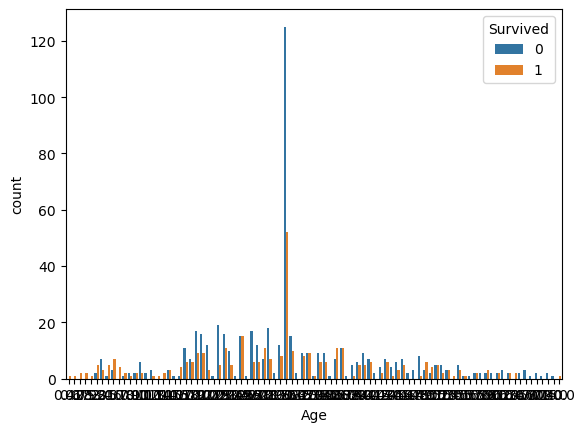

In [75]:
sns.countplot(x='Age' ,hue = 'Survived', data=ds )

<Axes: xlabel='Sex', ylabel='count'>

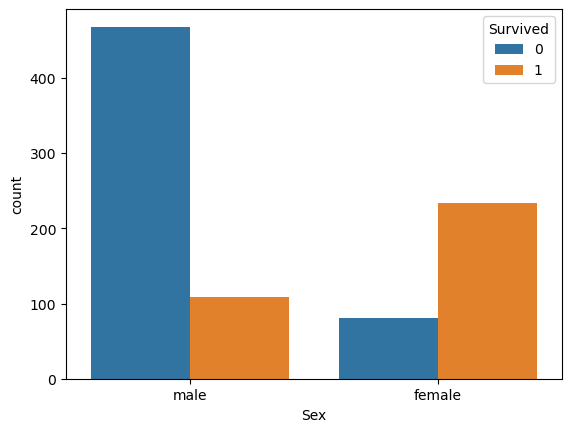

In [76]:
sns.countplot(x='Sex' ,hue = 'Survived', data=ds )

<Axes: xlabel='Pclass', ylabel='count'>

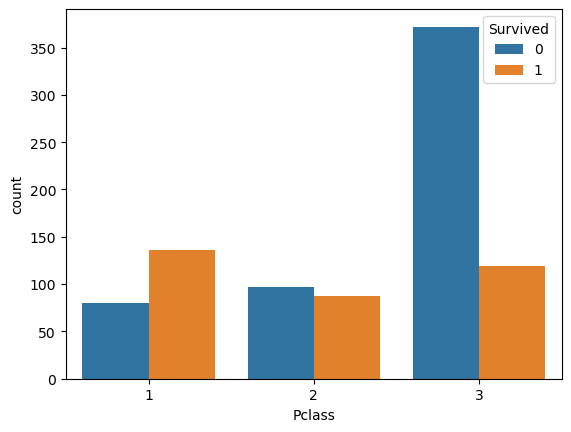

In [77]:
sns.countplot(x='Pclass' ,hue = 'Survived', data=ds )

Model Training 

In [79]:
ds.replace({'Embarked' : {'S':0 ,'C':1, 'Q':2} ,'Sex' : {'male':0 ,'female':1}} ,inplace = True)

C:\Users\karti\AppData\Local\Temp\ipykernel_24524\3648518588.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.replace({'Embarked' : {'S':0 ,'C':1, 'Q':2} ,'Sex' : {'male':0 ,'female':1}} ,inplace = True)


In [80]:
ds['Embarked'].value_counts()

Embarked
0.0    644
1.0    168
2.0     77
Name: count, dtype: int64

In [81]:
ds['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [82]:
x= ds.drop(columns=['Survived','Name','Ticket','PassengerId'])
y=ds['Survived']

In [83]:
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

Model Training 

In [92]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [94]:
prediction_m = model.predict(x_train)
accuracy_s = accuracy_score(y_train ,prediction_m)


In [96]:
a = accuracy_s*100 
print("Total accuracy score : ",a ,"%")

Total accuracy score :  98.59550561797754 %


In [110]:
test.drop(columns=['Name','PassengerId','Cabin','Ticket'],inplace = True)





In [124]:
test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
test.replace({'Embarked' : {'S':0 ,'C':1, 'Q':2}} ,inplace = True)

C:\Users\karti\AppData\Local\Temp\ipykernel_24524\1307124139.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.replace({'Embarked' : {'S':0 ,'C':1, 'Q':2}} ,inplace = True)


In [130]:
submission_preds = model.predict(test)


In [134]:
df = pd.DataFrame({'PassengerId': test_ids.values ,
                  'Survived':submission_preds })

In [136]:
df.to_csv("Submission.csv" ,index = False)